# Step 2.1: Exploratory Feature Analysis
## LinkedIn Engagement Prediction - TrendPilot

**Date:** February 1, 2026  
**Objective:** Analyze selected features and their relationships with engagement targets

---

## Overview

Comprehensive analysis of 90 selected features:
1. **Distribution Analysis:** Histograms, box plots for each feature
2. **Correlation Analysis:** Feature-target and feature-feature correlations
3. **Relationship Visualization:** Scatter plots for top features
4. **Statistical Summary:** Descriptive statistics

**Goal:** Understand feature characteristics before modeling

---

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ Libraries imported")

✓ Libraries imported


In [12]:
# Load selected features data
INPUT_FILE = '../data/selected_features_data.csv'
df = pd.read_csv(INPUT_FILE)

print(f"Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Identify feature and target columns
metadata_cols = ['name', 'slno', 'content', 'time_spent', 'location', 'followers']
target_cols = ['reactions', 'comments']
feature_cols = [col for col in df.columns if col not in metadata_cols + target_cols]

print(f"Features: {len(feature_cols)}")
print(f"Targets: {target_cols}")

df.head(3)

Dataset: 772 rows × 94 columns
Features: 87
Targets: ['reactions', 'comments']


,name,content,reactions,comments,time_spent,location,followers,influencer_avg_comments,reactions_per_sentiment,influencer_avg_engagement,...,is_promotional,has_hidden_truth,hook_x_power_score,has_org_mention,hook_score,ner_event_count,has_announcement_hook,has_specific_time_content,has_recency_hook,has_underdog
0,kevinswiber,I’m not famous. I’m not even popular. But I ha...,65.0,8.0,5,NaN,3690,8.0,125.920186,73.0,...,0,0,0,0,0,0,0,0,0,0
1,puneet-bhardwaj-849aa01,AI at the speed of light! While researching th...,34.0,2.0,3,NaN,2546,2.0,36.496350,36.0,...,0,0,0,1,0,0,0,0,0,0
2,jainnitin1983,I wanted to share that I’ve decided to move on...,34.0,5.0,1,NaN,3888,5.0,34.665579,39.0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
print(df.columns)

Index(['name', 'content', 'reactions', 'comments', 'time_spent', 'location',
       'followers', 'influencer_avg_comments', 'reactions_per_sentiment',
       'influencer_avg_engagement', 'comments_vs_influencer_avg',
       'reactions_vs_influencer_avg', 'influencer_total_engagement',
       'reactions_per_word', 'comments_per_word', 'sentiment_compound',
       'text_difficult_words_count', 'total_engagement_elements',
       'readability_flesch_kincaid', 'comment_to_reaction_ratio',
       'base_score_capped', 'text_lexical_diversity',
       'influencer_avg_sentiment', 'influencer_std_comments',
       'readability_gunning_fog', 'sentence_count', 'text_avg_sentence_length',
       'topic_count', 'influencer_std_reactions', 'sentiment_x_readability',
       'ner_location_count', 'style_question_marks', 'ner_org_count',
       'style_has_parentheses', 'influencer_avg_base_score',
       'ner_person_count', 'ner_date_count',
       'influencer_consistency_reactions', 'unique_emoji_coun

## 1. Target Variable Analysis

TARGET VARIABLE STATISTICS

REACTIONS:
  Mean: 353.93
  Median: 64.00
  Std: 897.26
  Min: 1
  Max: 5942
  Skewness: 4.57
  25th percentile: 21.00
  75th percentile: 242.00

COMMENTS:
  Mean: 32.62
  Median: 4.00
  Std: 80.80
  Min: 0
  Max: 529
  Skewness: 4.40
  25th percentile: 1.00
  75th percentile: 24.00


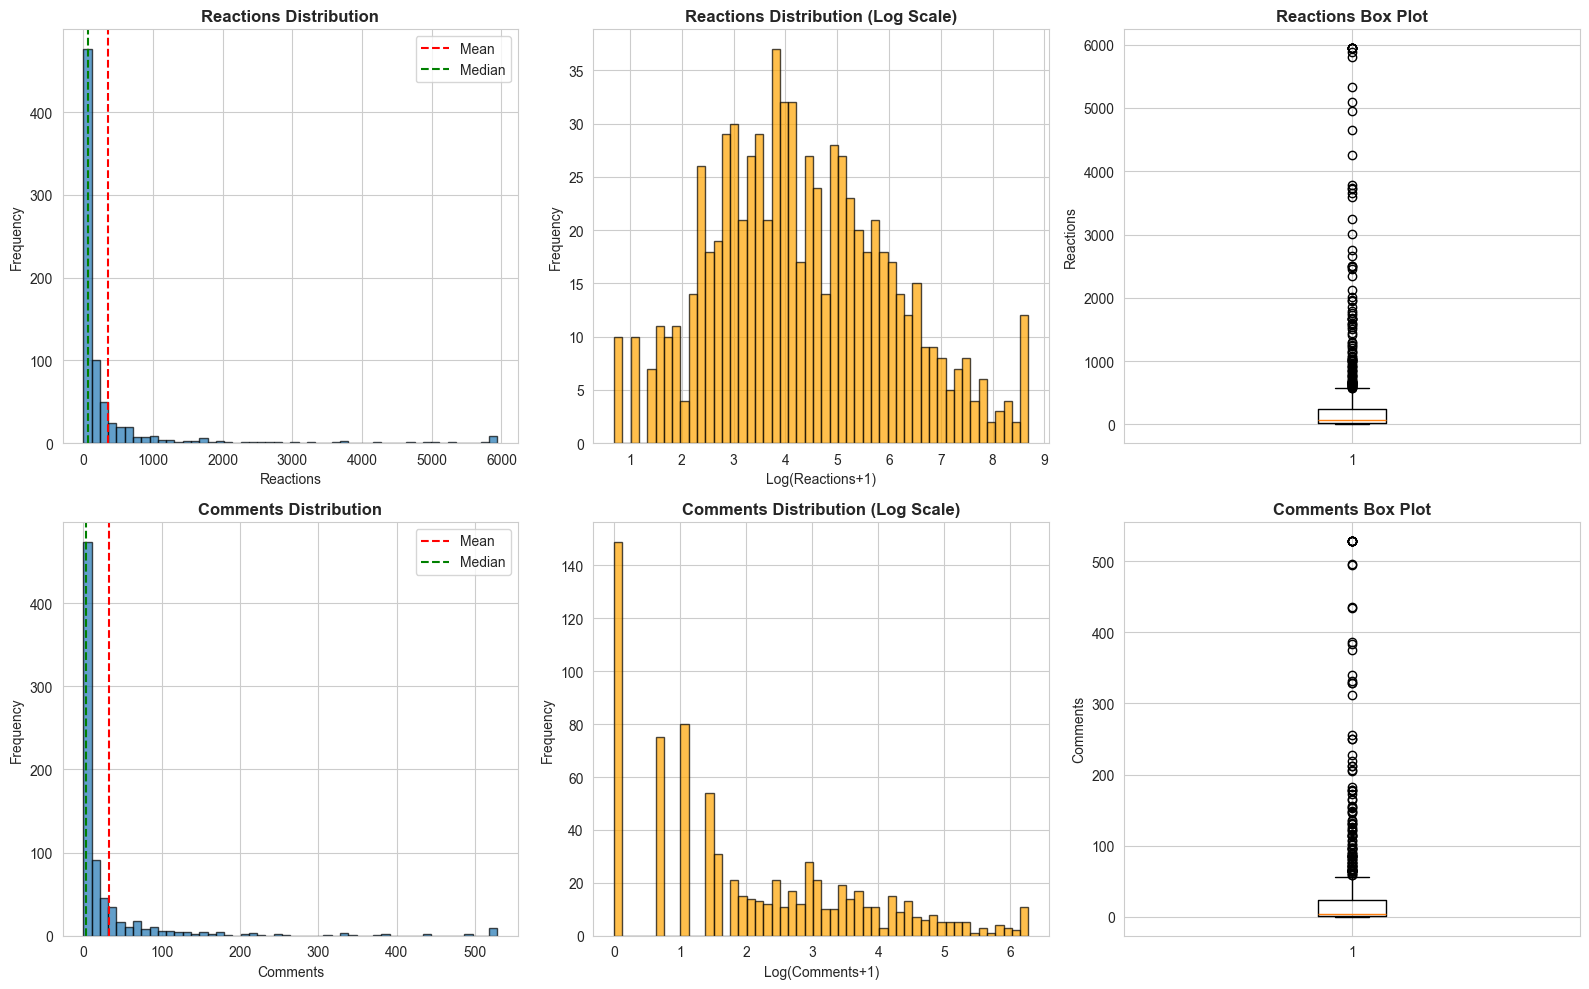


✓ Target analysis complete


In [14]:
print("TARGET VARIABLE STATISTICS")
print("="*60)

for target in target_cols:
    print(f"\n{target.upper()}:")
    print(f"  Mean: {df[target].mean():.2f}")
    print(f"  Median: {df[target].median():.2f}")
    print(f"  Std: {df[target].std():.2f}")
    print(f"  Min: {df[target].min():.0f}")
    print(f"  Max: {df[target].max():.0f}")
    print(f"  Skewness: {df[target].skew():.2f}")
    print(f"  25th percentile: {df[target].quantile(0.25):.2f}")
    print(f"  75th percentile: {df[target].quantile(0.75):.2f}")

# Visualize target distributions
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for i, target in enumerate(target_cols):
    # Histogram
    axes[i, 0].hist(df[target], bins=50, edgecolor='black', alpha=0.7)
    axes[i, 0].set_xlabel(target.capitalize())
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title(f'{target.capitalize()} Distribution', fontweight='bold')
    axes[i, 0].axvline(df[target].mean(), color='red', linestyle='--', label='Mean')
    axes[i, 0].axvline(df[target].median(), color='green', linestyle='--', label='Median')
    axes[i, 0].legend()
    
    # Log-scale histogram
    axes[i, 1].hist(np.log1p(df[target]), bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[i, 1].set_xlabel(f'Log({target.capitalize()}+1)')
    axes[i, 1].set_ylabel('Frequency')
    axes[i, 1].set_title(f'{target.capitalize()} Distribution (Log Scale)', fontweight='bold')
    
    # Box plot
    axes[i, 2].boxplot(df[target], vert=True)
    axes[i, 2].set_ylabel(target.capitalize())
    axes[i, 2].set_title(f'{target.capitalize()} Box Plot', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Target analysis complete")

## 2. Feature-Target Correlation

Calculating feature-target correlations...

Top 15 features correlated with REACTIONS:
                    feature  reactions_corr  abs_reactions
  influencer_avg_engagement        0.944592       0.944592
    reactions_per_sentiment        0.873501       0.873501
    influencer_avg_comments        0.770439       0.770439
         reactions_per_word        0.649445       0.649445
influencer_total_engagement        0.644275       0.644275
          comments_per_word        0.467959       0.467959
   influencer_std_reactions        0.437414       0.437414
    influencer_std_comments        0.301753       0.301753
reactions_vs_influencer_avg        0.156292       0.156292
 comments_vs_influencer_avg        0.139933       0.139933
  influencer_avg_base_score        0.128317       0.128317
 readability_flesch_kincaid       -0.124579       0.124579
    readability_gunning_fog       -0.118657       0.118657
          base_score_capped        0.114767       0.114767
            has_org_mention 

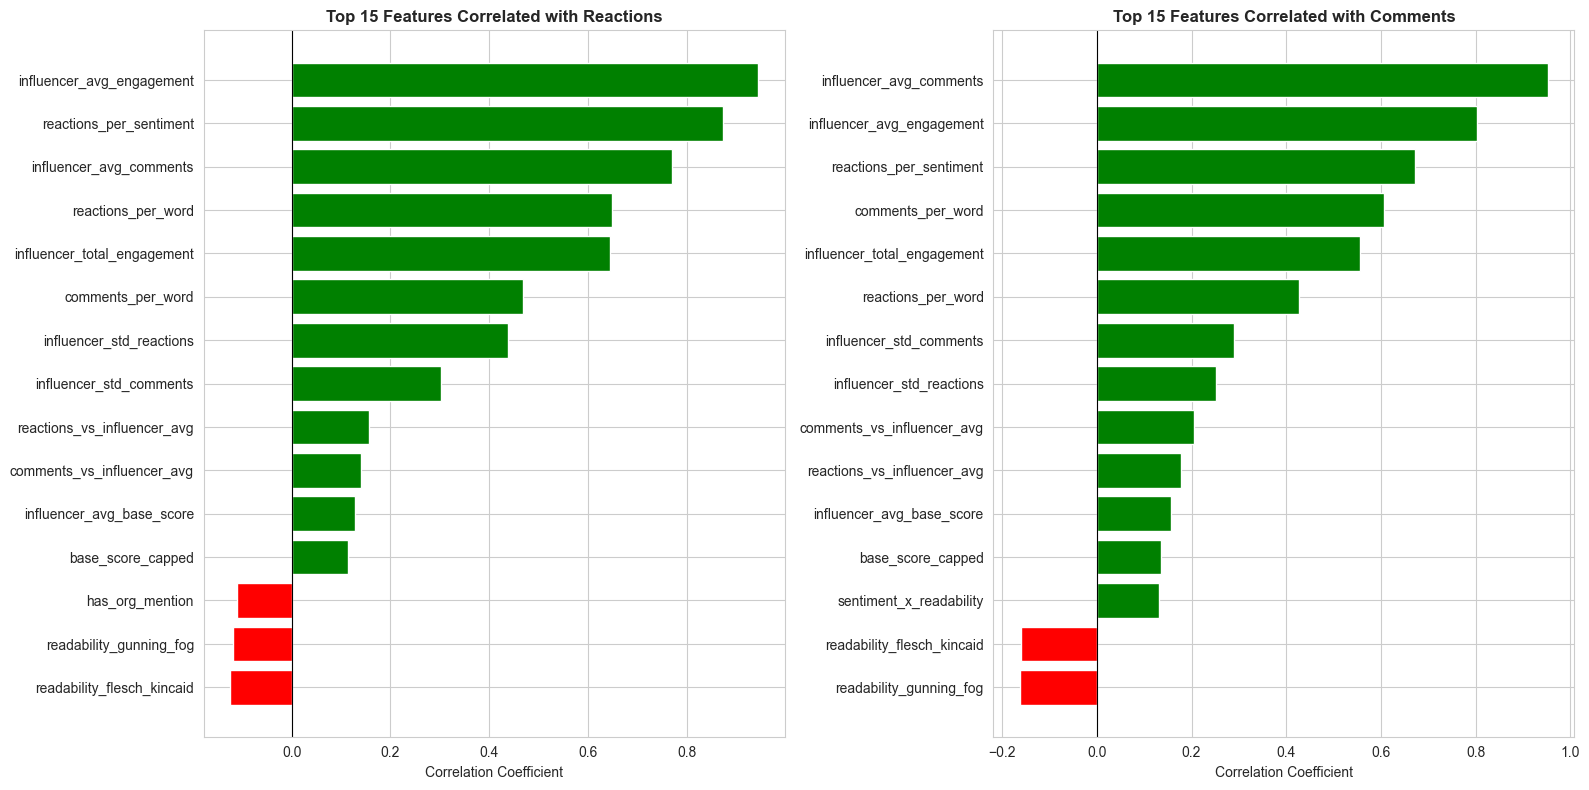


✓ Feature-target correlation analysis complete


In [15]:
print("Calculating feature-target correlations...")

# Calculate correlations
numeric_features = [col for col in feature_cols if df[col].dtype in [np.float64, np.int64]]
correlations = pd.DataFrame({
    'feature': numeric_features,
    'reactions_corr': [df[feat].corr(df['reactions']) for feat in numeric_features],
    'comments_corr': [df[feat].corr(df['comments']) for feat in numeric_features]
})

correlations['abs_reactions'] = correlations['reactions_corr'].abs()
correlations['abs_comments'] = correlations['comments_corr'].abs()
correlations['avg_abs_corr'] = (correlations['abs_reactions'] + correlations['abs_comments']) / 2

# Top correlations for reactions
print("\nTop 15 features correlated with REACTIONS:")
top_reactions = correlations.nlargest(15, 'abs_reactions')[['feature', 'reactions_corr', 'abs_reactions']]
print(top_reactions.to_string(index=False))

# Top correlations for comments
print("\nTop 15 features correlated with COMMENTS:")
top_comments = correlations.nlargest(15, 'abs_comments')[['feature', 'comments_corr', 'abs_comments']]
print(top_comments.to_string(index=False))

# Visualize top correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Reactions
top15_reactions = correlations.nlargest(15, 'abs_reactions').sort_values('reactions_corr')
colors_r = ['green' if x > 0 else 'red' for x in top15_reactions['reactions_corr']]
axes[0].barh(range(15), top15_reactions['reactions_corr'], color=colors_r)
axes[0].set_yticks(range(15))
axes[0].set_yticklabels(top15_reactions['feature'])
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_title('Top 15 Features Correlated with Reactions', fontweight='bold')
axes[0].axvline(0, color='black', linestyle='-', linewidth=0.8)

# Comments
top15_comments = correlations.nlargest(15, 'abs_comments').sort_values('comments_corr')
colors_c = ['green' if x > 0 else 'red' for x in top15_comments['comments_corr']]
axes[1].barh(range(15), top15_comments['comments_corr'], color=colors_c)
axes[1].set_yticks(range(15))
axes[1].set_yticklabels(top15_comments['feature'])
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Top 15 Features Correlated with Comments', fontweight='bold')
axes[1].axvline(0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.show()

print("\n✓ Feature-target correlation analysis complete")

## 3. Feature Distributions

Analyzing feature distributions...


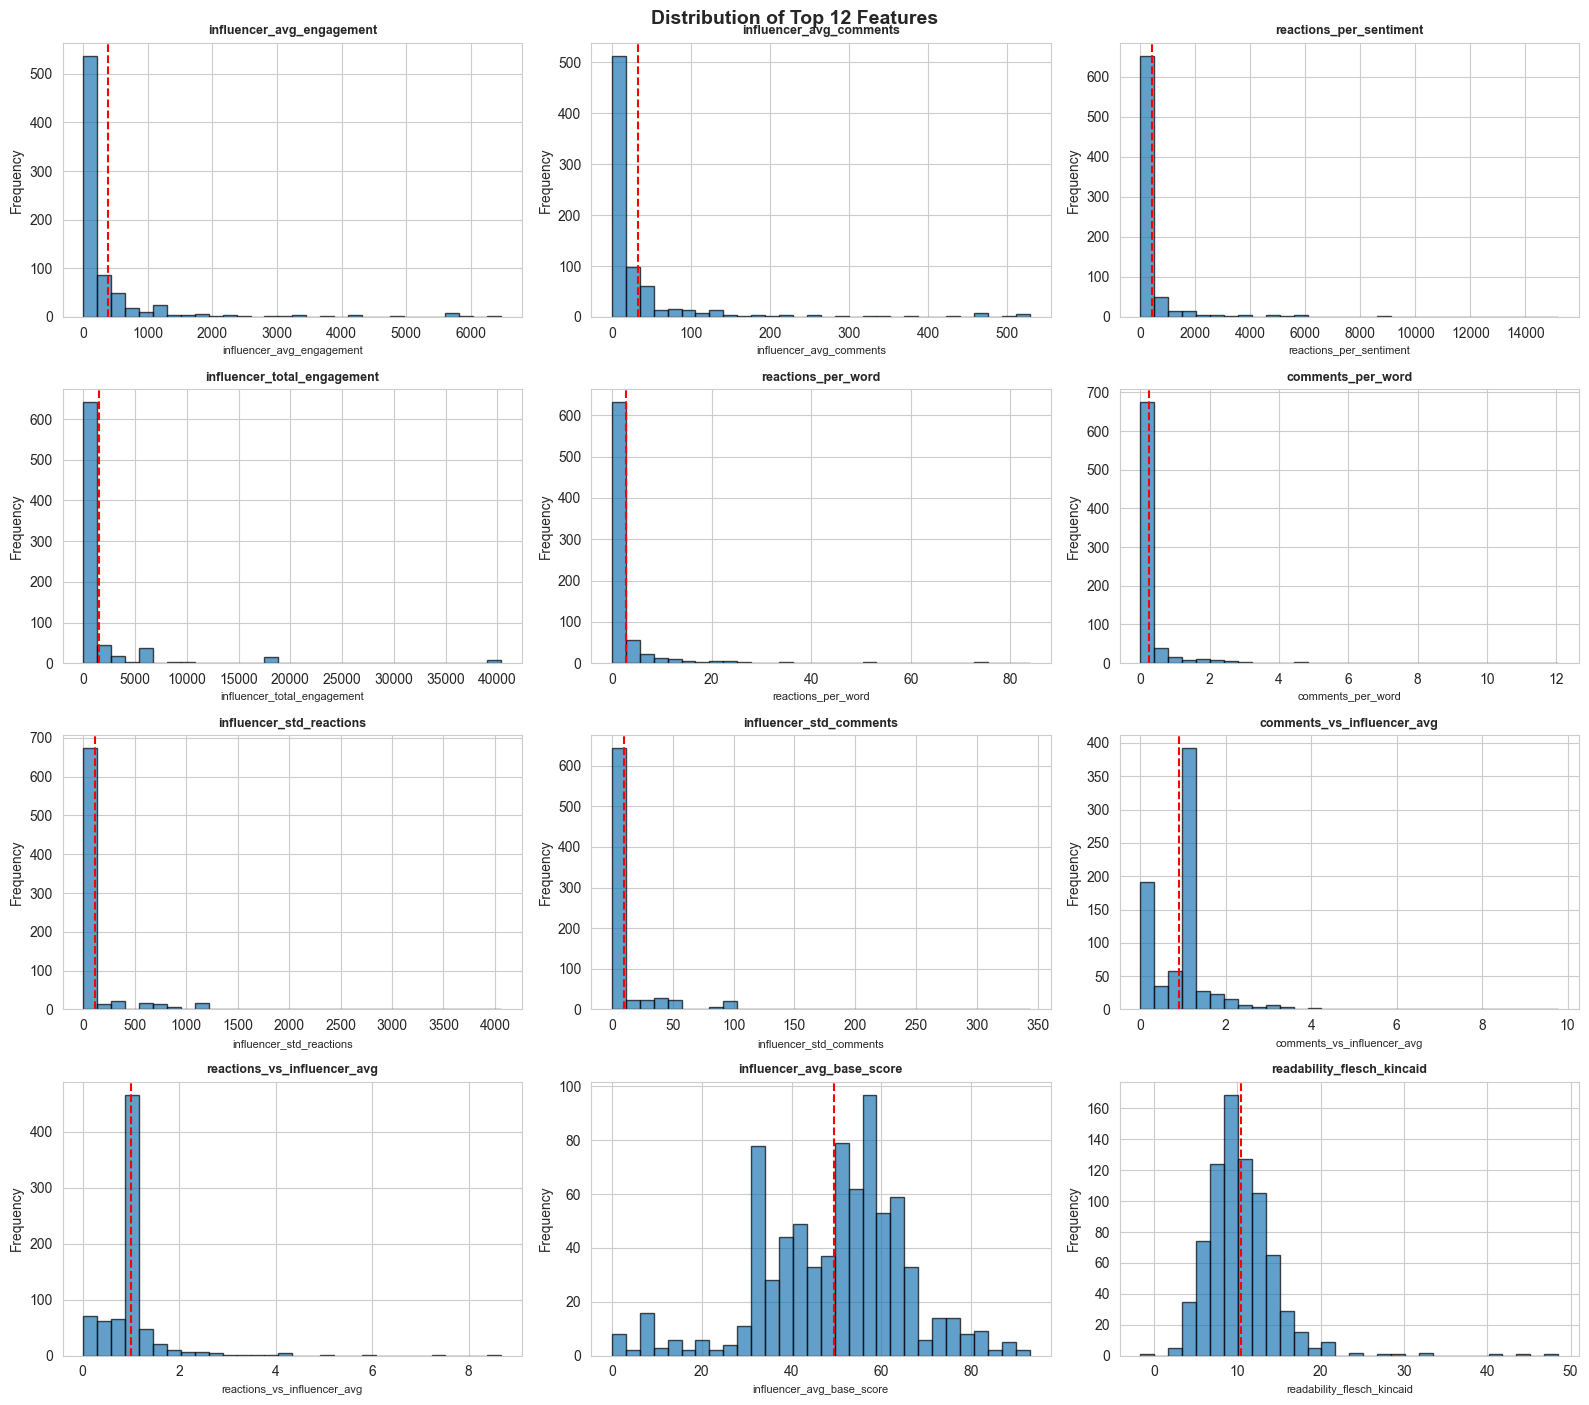


✓ Feature distribution analysis complete


In [16]:
print("Analyzing feature distributions...")

# Top 12 most important features for detailed analysis
top_features = correlations.nlargest(12, 'avg_abs_corr')['feature'].tolist()

fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.flatten()

for i, feat in enumerate(top_features):
    axes[i].hist(df[feat].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(feat, fontsize=8)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{feat}', fontweight='bold', fontsize=9)
    axes[i].axvline(df[feat].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean')

plt.tight_layout()
plt.suptitle('Distribution of Top 12 Features', fontsize=14, fontweight='bold', y=1.00)
plt.show()

print("\n✓ Feature distribution analysis complete")

## 4. Scatter Plots: Features vs Targets

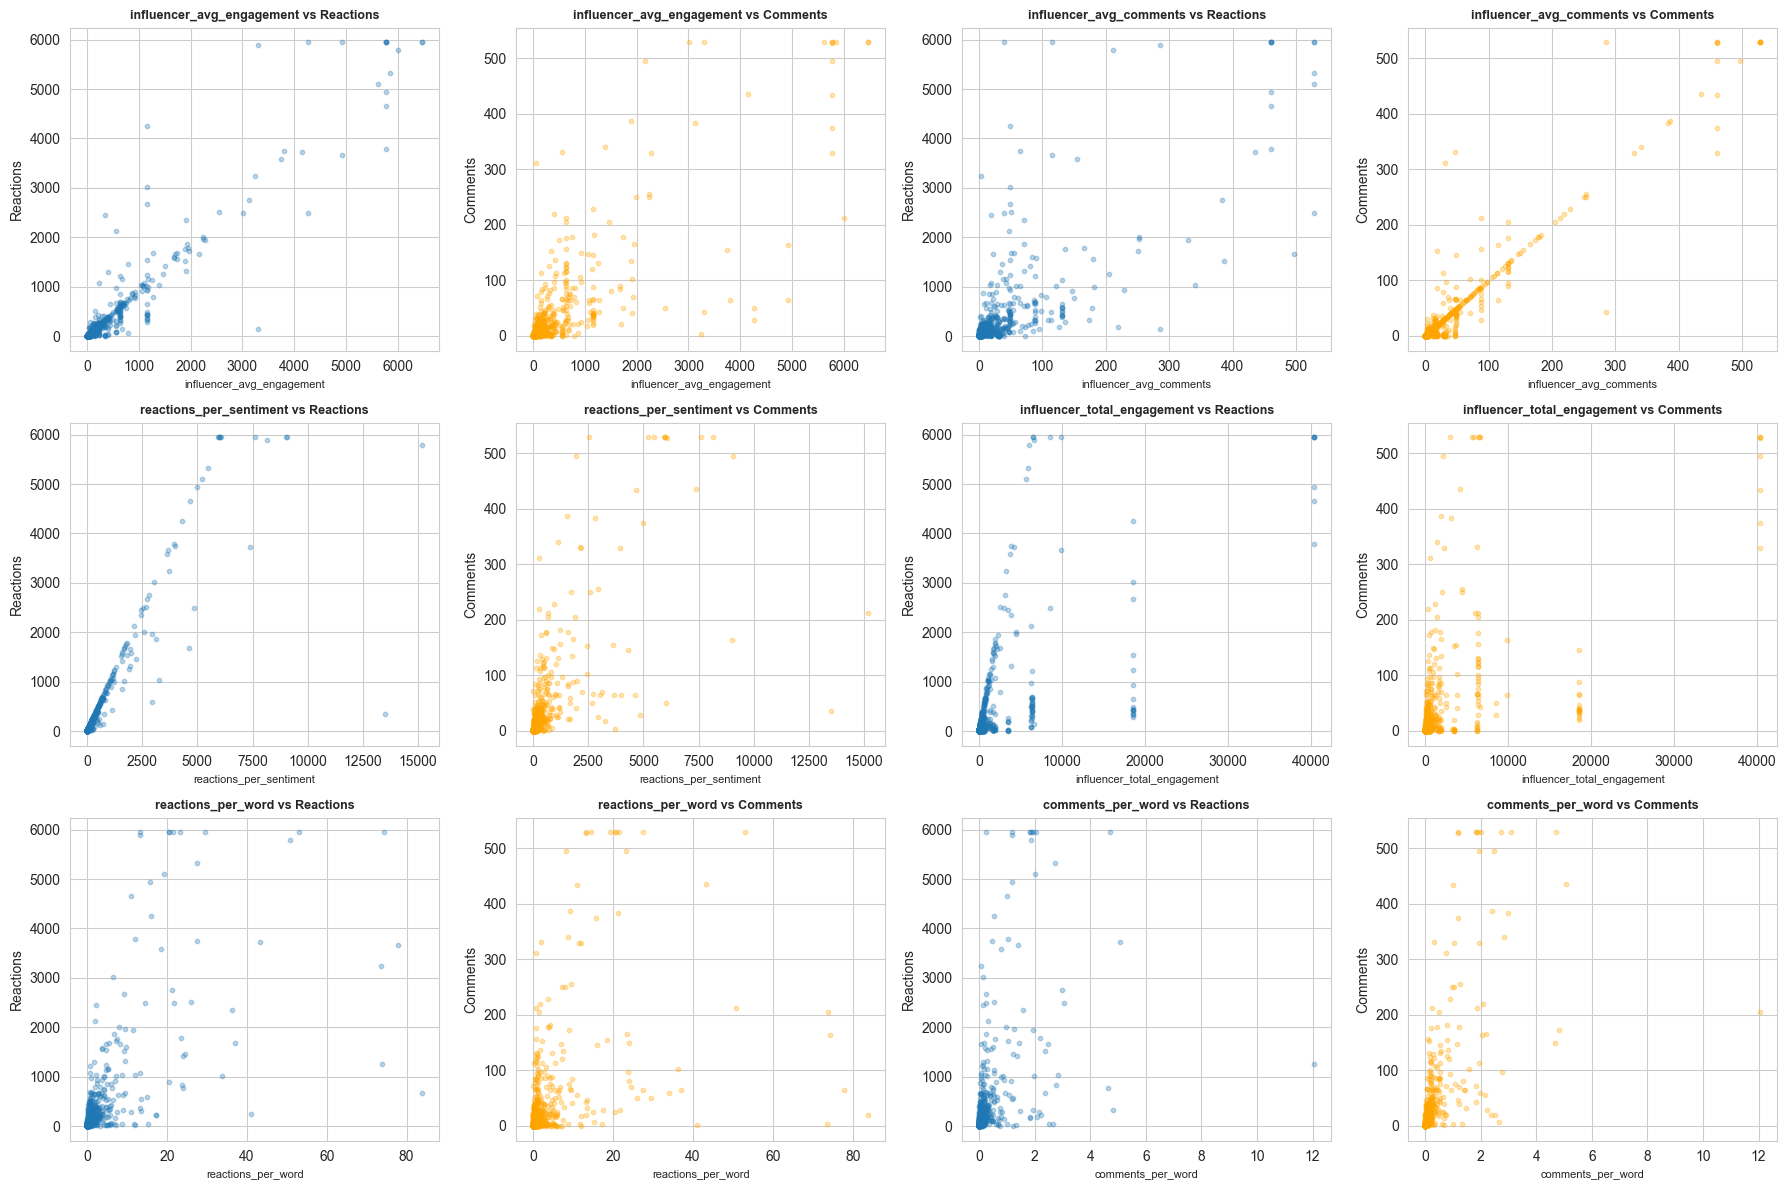

✓ Scatter plot analysis complete


In [17]:
# Scatter plots for top 6 features
top6_features = correlations.nlargest(6, 'avg_abs_corr')['feature'].tolist()

fig, axes = plt.subplots(3, 4, figsize=(18, 12))

for i, feat in enumerate(top6_features):
    # vs reactions
    axes[i//2, (i%2)*2].scatter(df[feat], df['reactions'], alpha=0.3, s=10)
    axes[i//2, (i%2)*2].set_xlabel(feat, fontsize=8)
    axes[i//2, (i%2)*2].set_ylabel('Reactions')
    axes[i//2, (i%2)*2].set_title(f'{feat} vs Reactions', fontweight='bold', fontsize=9)
    
    # vs comments
    axes[i//2, (i%2)*2+1].scatter(df[feat], df['comments'], alpha=0.3, s=10, color='orange')
    axes[i//2, (i%2)*2+1].set_xlabel(feat, fontsize=8)
    axes[i//2, (i%2)*2+1].set_ylabel('Comments')
    axes[i//2, (i%2)*2+1].set_title(f'{feat} vs Comments', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("✓ Scatter plot analysis complete")

## 5. Feature Correlation Heatmap

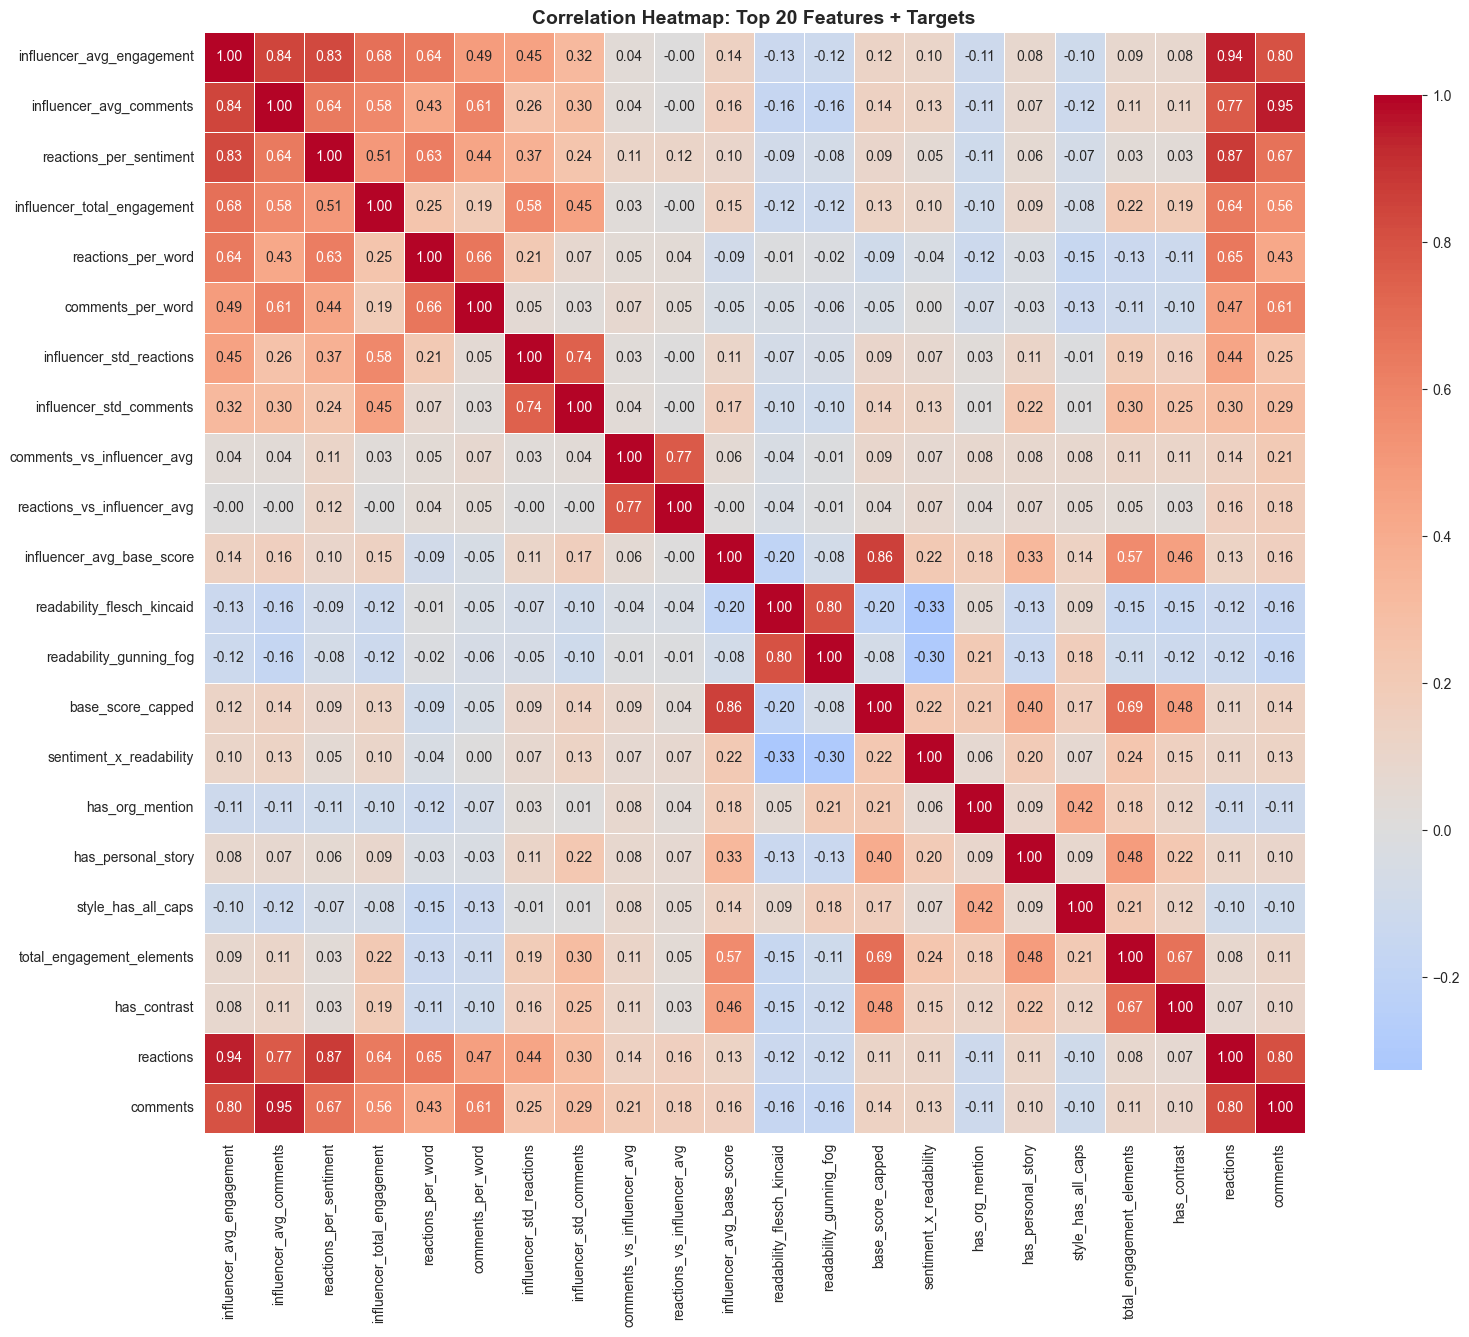

✓ Correlation heatmap complete


In [18]:
# Correlation heatmap for top 20 features
top20_features = correlations.nlargest(20, 'avg_abs_corr')['feature'].tolist()
top20_data = df[top20_features + target_cols]
corr_matrix = top20_data.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Top 20 Features + Targets', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Correlation heatmap complete")

## 6. Statistical Summary

In [19]:
# Comprehensive statistical summary
print("STATISTICAL SUMMARY OF TOP FEATURES")
print("="*80)

summary_stats = df[top_features].describe().T
summary_stats['skewness'] = df[top_features].skew()
summary_stats['kurtosis'] = df[top_features].kurtosis()

print(summary_stats.to_string())

print("\n" + "="*80)
print("✓ Statistical summary complete")

STATISTICAL SUMMARY OF TOP FEATURES
                             count         mean          std       min        25%         50%         75%           max  skewness    kurtosis
influencer_avg_engagement    772.0   386.547254   912.398725  1.000000  30.500000   82.500000  309.750000   6471.060000  4.525068   22.403218
influencer_avg_comments      772.0    32.620000    77.013324  0.000000   2.000000    6.750000   28.272727    528.580000  4.499897   22.254978
reactions_per_sentiment      772.0   441.101795  1269.001027  1.000300  23.899251   74.120793  267.468410  15188.580409  6.183991   49.622079
influencer_total_engagement  772.0  1515.172927  4767.756545  1.000000  63.000000  215.000000  644.000000  40370.080000  5.940519   40.884496
reactions_per_word           772.0     2.863847     8.286858  0.001050   0.112274    0.471563    1.759755     83.875000  6.116659   45.438696
comments_per_word            772.0     0.234539     0.707317  0.000000   0.004088    0.028574    0.147819     12

## 7. Key Insights Summary

In [20]:
print("\n" + "="*80)
print("KEY INSIGHTS FROM EXPLORATORY ANALYSIS")
print("="*80)

print("\n1. TARGET VARIABLES:")
print(f"   - Reactions: Mean={df['reactions'].mean():.1f}, Median={df['reactions'].median():.1f}")
print(f"   - Comments: Mean={df['comments'].mean():.1f}, Median={df['comments'].median():.1f}")
print(f"   - Both targets are right-skewed (more low-engagement posts)")

print("\n2. STRONGEST PREDICTORS (Reactions):")
for i, row in correlations.nlargest(5, 'abs_reactions').iterrows():
    print(f"   - {row['feature']}: r={row['reactions_corr']:.3f}")

print("\n3. STRONGEST PREDICTORS (Comments):")
for i, row in correlations.nlargest(5, 'abs_comments').iterrows():
    print(f"   - {row['feature']}: r={row['comments_corr']:.3f}")

print("\n4. FEATURE CHARACTERISTICS:")
print(f"   - Total features analyzed: {len(numeric_features)}")
print(f"   - Features with |r|>0.1 (reactions): {len(correlations[correlations['abs_reactions'] > 0.1])}")
print(f"   - Features with |r|>0.1 (comments): {len(correlations[correlations['abs_comments'] > 0.1])}")

print("\n5. MODELING RECOMMENDATIONS:")
print("   - Target transformation: Apply log transformation to reduce skewness")
print("   - Feature scaling: Standardize features before modeling")
print("   - Model selection: Tree-based models may handle non-linear relationships better")
print("   - Evaluation: Focus on MAPE/MAE due to outliers in targets")

print("\n" + "="*80)
print("SUCCESS: Exploratory analysis complete!")
print("="*80)
print("\nNext step: Model Training")


KEY INSIGHTS FROM EXPLORATORY ANALYSIS

1. TARGET VARIABLES:
   - Reactions: Mean=353.9, Median=64.0
   - Comments: Mean=32.6, Median=4.0
   - Both targets are right-skewed (more low-engagement posts)

2. STRONGEST PREDICTORS (Reactions):
   - influencer_avg_engagement: r=0.945
   - reactions_per_sentiment: r=0.874
   - influencer_avg_comments: r=0.770
   - reactions_per_word: r=0.649
   - influencer_total_engagement: r=0.644

3. STRONGEST PREDICTORS (Comments):
   - influencer_avg_comments: r=0.953
   - influencer_avg_engagement: r=0.803
   - reactions_per_sentiment: r=0.671
   - comments_per_word: r=0.606
   - influencer_total_engagement: r=0.555

4. FEATURE CHARACTERISTICS:
   - Total features analyzed: 87
   - Features with |r|>0.1 (reactions): 17
   - Features with |r|>0.1 (comments): 22

5. MODELING RECOMMENDATIONS:
   - Target transformation: Apply log transformation to reduce skewness
   - Feature scaling: Standardize features before modeling
   - Model selection: Tree-based m